# Exploring Terms in the Encyclopaedia Britannica


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

### Functions

In [4]:
def create_graph_df(df):
    num=50
    graph_df = nx.from_pandas_edgelist(df.head(n=num), source='term', target='related_terms', edge_attr=True)
    return graph_df
   

In [89]:
def explore_a_term(df, term):
    #term_df= df[df['term'].str.contains(term)]
    term_df = df[df["term"]==term]
    
    G = create_graph_df(term_df)
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=8, alpha=1)
    plt.axis('off')
    plt.show()

## We have dataframe with these information



- definition:           Definition of the article
- edition_num:          1,2,3,4,5,6,7,8
- header:               Header of the page's article                                  
- num_article_words:    Number of words per article
- place:                Place where the volume was edited (e.g. Edinburgh)                                    
- related_terms:        Related articles (see X article)  
- source_text_file:     File Path of the XML file from which the article belongs       
- term:                 Article name                            
- term_id_in_page:      Number of article in the page     
- start_page:           Number page in which the article starts 
- end_page:             Number page in which the article ends 
- title:               Title of the Volume
- type_article:            Type of Page [Full Page| Topic| Mix | Articles]                                       
- year:                 Year of the Volume
- volume:               volume (e.g. 1)
- letters:              leters of the volume (A-B)


### 1. Load dataframe from JSON file

In [86]:
df = pd.read_json('./results_NLS/results_eb_1_edition_postprocess_dataframe', orient="index") 

In [87]:
df = df[["term", "definition", "related_terms", "num_article_words", "header", "start_page", "end_page",  "term_id_in_page", "type_article", "edition_num", "volume", "letters", "year", "title",  "place", "source_text_file"  ]]
df

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
1,FIRSTARTICLE,S :u -I >;J .1 M U a C V',[],10,**■*,8,8,0,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082813.34.xml
10,AAM,"a Dutch measure for liquids, containing about ...",[],17,EncyclopaediaBritannica,15,15,5,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
100,ABEYANCE,"in law, the expedtancy of an edate. Thus if la...",[],36,ABE,18,18,0,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082943.34.xml
1000,ALCACER,"de Sal, or Alcarez, a town of Portugal in the ...",[],26,ALBALC,106,106,24,Mix,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188084090.34.xml
10000,NYCTALOPIA,"in medicine, a two-sold disorder or the eye, o...",[],67,NYBNYS,473,473,4,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810223.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NUTMEG,"the kernel of a large fruit, not unlike the Th...","[MACE, PEEMED, DUTCH, THELARGEFT, EAP-INDIES, ...",451,NUTNUT,472,472,10,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810211.34.xml
9996,NUTRITION,"in the animal ceconomy, is the repairing the c...",[PISTACHIA],486,NUTNUT,472,473,11,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810211.34.xml
9997,NUYS,"a town of Germany, twenty miles north of Co-",[],9,NYBNYS,473,473,1,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810223.34.xml
9998,INYBURG,"a town of Denmark, situated at the eafiend of ...",[],25,NYBNYS,473,473,2,Article,1,3,M-Z,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133903/alto/144810223.34.xml


### 2. Related Terms

### 2.1 Selecting just the volumes 1771

In [103]:
df_1771_vol1 = df[(df['year'] == 1771) & (df['volume'] == 1) ]


### 2.2 Counting the number of terms

**Remember**: A term can appear in more than once  per eddition. 

In [104]:
df_1771_vol1.count()

term                 3900
definition           3900
related_terms        3900
num_article_words    3900
header               3900
start_page           3900
end_page             3900
term_id_in_page      3900
type_article         3900
edition_num          3900
volume               3900
letters              3900
year                 3900
title                3900
place                3900
source_text_file     3900
dtype: int64

**Note**: This means that we have 4204 terms in 1771

### 3. NOT DOING IT: Filtering the terms that have related terms

NOT DOING IT ANYMORE: We are interested to explore the relations between terms, so we are going to filter out all these terms wich do not have related terms

In [105]:
#df_related_1771_vol1=df_1771_vol1[df_1771_vol1['related_terms'].apply(lambda x: len(x)) > 0]

### NEW: 3. WITHOUT Filtering the terms that have related terms

We need to "explode" teh column "related_terms", so we have a row, per related term. 

So, lets imagine that we have the term "X" and its related terms are "Y" and "Z". Originally we would a row, in which the related_terms colum value would be ["X", "Y"]. 

After exploding the related_terms colum, now we are going to have two rows with exactly the same information, but in one row, we will have "Y" as the related term, and in another "Z". 

In [106]:
# Experimenting without filtering by related_terms

df_related_1771_vol1=df_1771_vol1.explode('related_terms')

Instead of filtering by related_terms, we are going to give the same term, to the related_terms column, if a related_term colum is NaN

In [107]:
df_related_1771_vol1['related_terms'] =df_related_1771_vol1['related_terms'].fillna(df_related_1771_vol1['term'])

In [108]:
df_related_1771_vol1

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
1,FIRSTARTICLE,S :u -I >;J .1 M U a C V',FIRSTARTICLE,10,**■*,8,8,0,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082813.34.xml
4,PREFACE,"TH E Editors, though fully fen&ble of the prop...",PREFACE,410,viPREFACE,12,12,0,Topic,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082865.34.xml
5,OR,"Albini tabule anatomies, Alfton’s ‘Tirocinium ...",OR,519,LISTofAUTHORSc,13,15,0,Topic,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082878.34.xml
6,AABAM,"a term, among alchemifts, for lead,",AABAM,6,EncyclopaediaBritannica,15,15,1,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
7,AACH,the name of a town and river in Swabia. It is ...,AACH,17,EncyclopaediaBritannica,15,15,2,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,BYSSUS,"in botany, a genus of moffes belonging to the ...",BYSSUS,38,BUXBYZ,829,829,11,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml
3961,BYSSUS,"in antiquity, that fine Egyptian linen whereof...",BYSSUS,77,BUXBYZ,829,829,12,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml
3962,BYZANT,See Bezant. ^,BEZANT,3,BUXBYZ,829,829,13,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml
3963,BYZANTIUM,"the ancient mame of Constantinople,",BYZANTIUM,5,BUXBYZ,829,829,14,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188093489.34.xml


### 4.Creating a graph with the first 20 terms

We are going to select the first 20 elements, and visualize their related terms. 

In [109]:

graph_df = create_graph_df(df_related_1771_vol1)


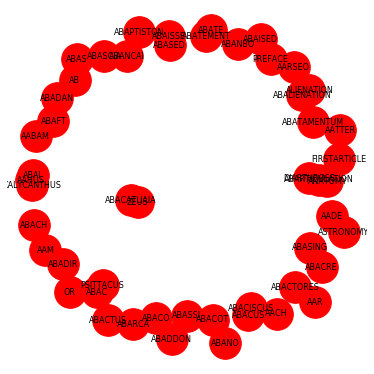

In [110]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(graph_df)
nx.draw(graph_df, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=8, alpha=1)
plt.axis('off')
plt.show()


Here are the 20 terms stored in a list

In [113]:
list_terms= df_related_1771_vol1[["term"]].head(n=50).values.tolist()
list_terms_update=[]
for i in list_terms:
    list_terms_update.append(i[0])
list_terms_update

['FIRSTARTICLE',
 'PREFACE',
 'OR',
 'AABAM',
 'AACH',
 'AADE',
 'AAHUS',
 'AAM',
 'AAR',
 'AARSEO',
 'AATTER',
 'AB',
 'ASTRONOMY',
 'AB',
 'ABACATUAIA',
 'ABAC',
 'ABACH',
 'ABACISCUS',
 'ABACO',
 'ABACOT',
 'ABACTORES',
 'ABACTUS',
 'ABACUS',
 'ABACUS',
 'ABACUS',
 'ABACUS',
 'ABADAN',
 'ABADDON',
 'ABADIR',
 'ABACRE',
 'ABAFT',
 'ABAI',
 'ABAISSE',
 'ABALIENATION',
 'ABANBO',
 'ABANCAI',
 'ABANO',
 'ABAPTISTON',
 'ABARCA',
 'ABARTICULATION',
 'ABARTICULATION',
 'ABAS',
 'ABASCIA',
 'ABAISED',
 'ABASING',
 'ABASSI',
 'ABATAMENTUM',
 'ABATE',
 'ABATE',
 'ABATEMENT']

And now lets create a network graph for displaying those relationships

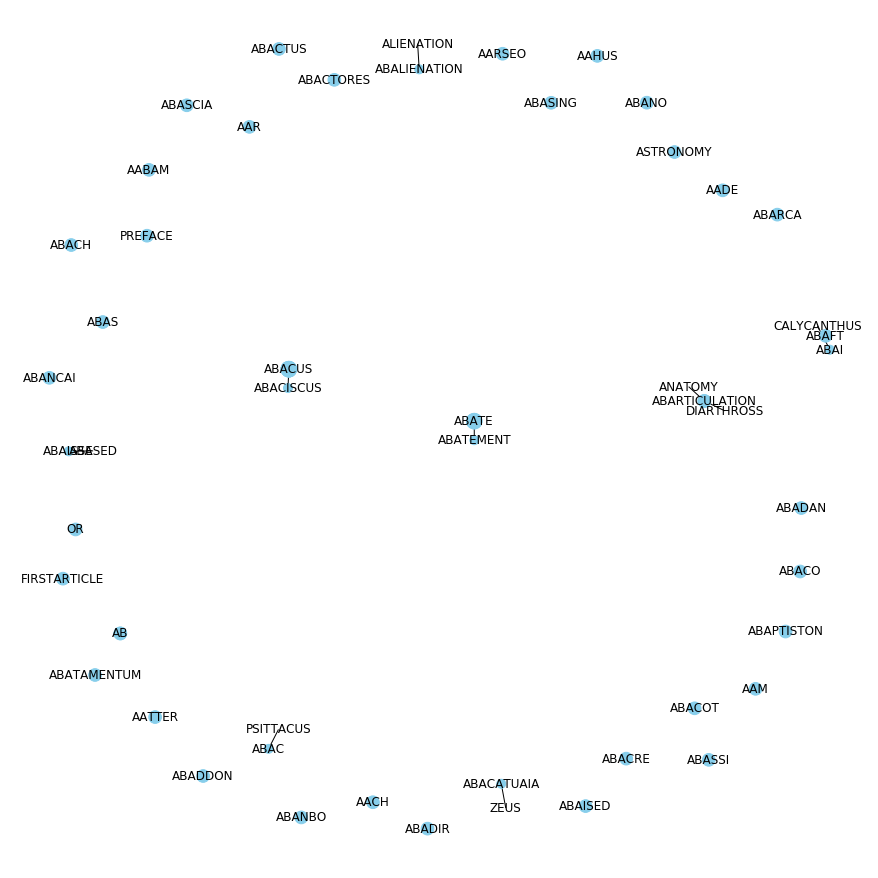

In [114]:
term_size = [graph_df.degree(t) * 80 for t in list_terms_update]

plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, nodelist= list_terms_update, node_size= term_size, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.axis('off')
plt.show()

### 5.Exploring the relations of one term - ABACISCUS

We are going to use the term ABACISCUS, and visualize its related terms in a graph. 

In [115]:
ABACISCUS_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ABACISCUS")]
ABACISCUS_df

,term,definition,related_terms,num_article_words,header,start_page,end_page,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
20,ABACISCUS,See ABACUS.,ABACUS,2,EncyclopaediaBritannica,15,15,15,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,144133901/alto/188082904.34.xml


In [116]:
G = create_graph_df(ABACISCUS_df)

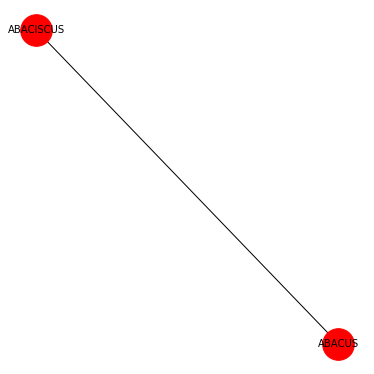

In [117]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
nx.draw(G, cmap = plt.get_cmap('jet'), with_labels=True, node_size = 1000, font_size=10, alpha=1)
plt.axis('off')
plt.show()

### 5.Exploring the terms with most relations.

Now lets get the 10 terms with most relations. For that, we have to group the dataframe by terms, and create an extra colum, with the count. 

In [118]:
rt=df_related_1771_vol1.groupby(['term']).size().rename('count').reset_index().sort_values(['count'], ascending=False)
rt

,term,count
2710,BBTE,101
3252,BOTANY,86
1368,ANA,50
1946,ARCHITECTURE,37
2019,ARITHMETICK,23
...,...,...
1460,ANCYLE,1
1462,ANDROMEDA,1
1463,ANDROMOTY,1
1464,ANDRON,1


And now lets get the 10 most repeated terms

In [119]:
rt.nlargest(10, 'count')

,term,count
2710,BBTE,101
3252,BOTANY,86
1368,ANA,50
1946,ARCHITECTURE,37
2019,ARITHMETICK,23
2214,ASTRONOMY,17
3361,BRANDY,16
2009,ARIH,15
3749,S,15
1445,ANATOMY,13


Lets select ASTRONOMY term

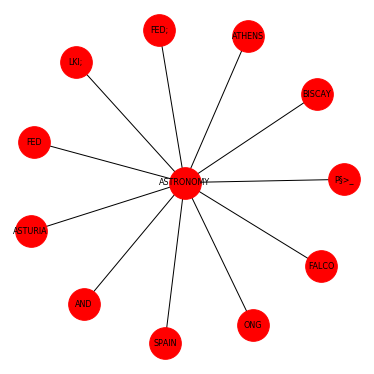

In [120]:
explore_a_term(df_related_1771_vol1, "ASTRONOMY")

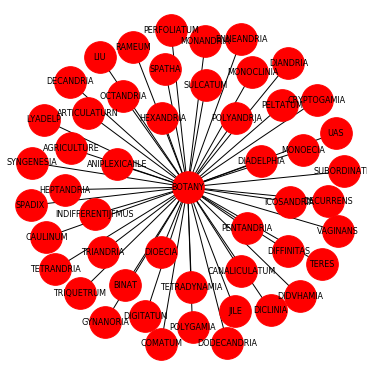

In [121]:
explore_a_term(df_related_1771_vol1, "BOTANY")

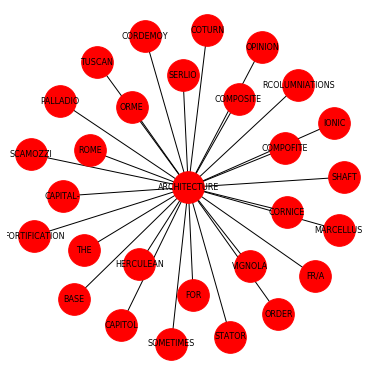

In [122]:
explore_a_term(df_related_1771_vol1, "ARCHITECTURE")

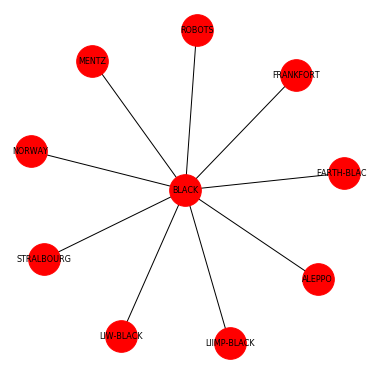

In [123]:
explore_a_term(df_related_1771_vol1, "BLACK")

In [124]:
ALGEBRA_df= df_related_1771_vol1[df_related_1771_vol1['term'] == "ALGEBRA"]
ALGEBRA_df["related_terms"]

1080    ALGEBRA
1083    ALGEBRA
1085    ALGEBRA
1092    ALGEBRA
Name: related_terms, dtype: object

In [125]:
ALGEBRA_df= df_related_1771_vol1[df_related_1771_vol1['related_terms'] == "ALGEBRA"]

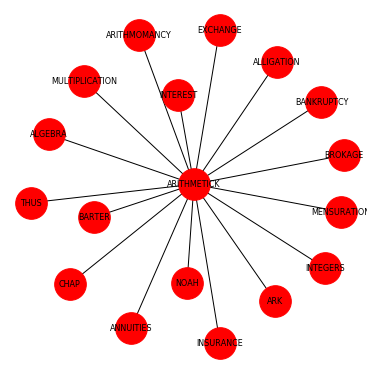

In [127]:
explore_a_term(df_related_1771_vol1, "ARITHMETICK")